# Exercise 4
## Lucas Kujawski & Yaniv Zlotnik
### IDs : 000331506 & 314880493

In [1]:
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install pandas
!pip install sklearn
!pip install scipy
!pip install pydotplus

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
import datetime
from pandas.api.types import is_numeric_dtype
import sklearn as skl
from scipy.stats import skewnorm
import scipy.stats as stats
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import pydotplus

You should consider upgrading via the '/Users/lucaskujawski/.virtualenvs/data2/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/lucaskujawski/.virtualenvs/data2/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/lucaskujawski/.virtualenvs/data2/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/lucaskujawski/.virtualenvs/data2/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/lucaskujawski/.virtualenvs/data2/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/lucaskujawski/.virtualenvs/data2/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/lucaskujawski/.virtualenvs/data2/bin/python -m pip install --upgrade pip' command.


In [2]:
df = pd.read_csv('penguins.csv')

In [3]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [4]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [5]:
#We replace NA values for the mean. In this way, we keep the overall values
df.fillna(df.mean(), inplace=True)

In [6]:
#Although they are nominal categorical, we convert them to categorical to plot them
df['ordered_species'] = pd.Categorical(df.species,ordered=True,categories=['Adelie', 'Chinstrap', 'Gentoo']).codes
df['ordered_island'] = pd.Categorical(df.island,ordered=True,categories=['Torgersen', 'Biscoe', 'Dream']).codes

In [7]:
#We do the same with boolean variables
df['is_female'] = df['sex'] == 'Female'

In [8]:
#We see how the DF looks now
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,ordered_species,ordered_island,is_female
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,Male,0,0,False
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,Female,0,0,True
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,Female,0,0,True
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,NaN,0,0,False
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,Female,0,0,True


## 1.1
#### We plot some relations to see if two variables give good split.

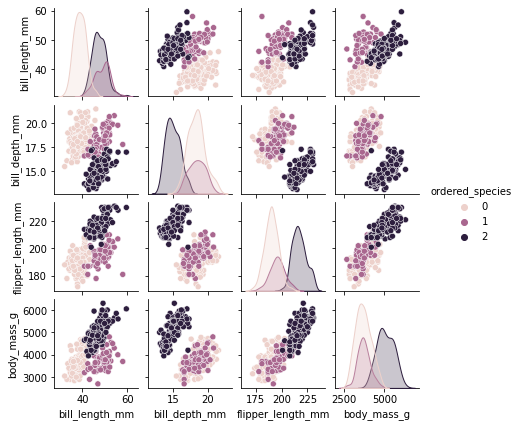

In [9]:
sns.pairplot(df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'ordered_species']], hue='ordered_species', height=1.5)

#### After this graph, we can appreciate that there are three good splits candiates:
1. body_mass_g vs bill_length_mm
2. bill_length_mm vs bill_depth_mm
3. flipper_length_mm vs bill_length_mm

/Users/lucaskujawski/.virtualenvs/data2/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/lucaskujawski/.virtualenvs/data2/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


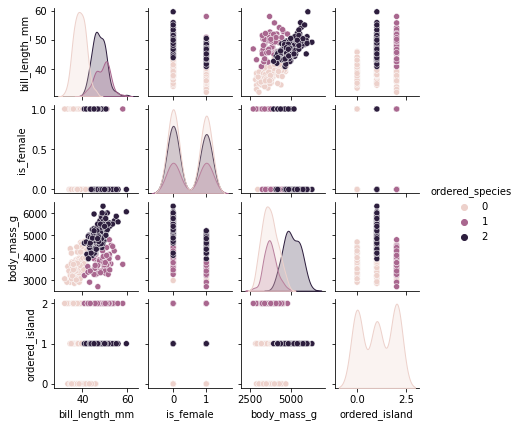

In [10]:
sns.pairplot(df[['bill_length_mm', 'is_female', 'body_mass_g', 'ordered_island', 'ordered_species']], hue='ordered_species', height=1.5)


After this graph, we can appreciate that there is not an important relation more than what we observed before. 

## 1.2
#### We will check the accuracy of the models trained on:
1. body_mass_g vs bill_length_mm
2. flipper_length_mm vs bill_length_mm
3. bill_depth_mm vs bill_length_mm

#### We train the models using 80% of the dataset as tranining set

### body_mass_g vs bill_length_mm:

In [11]:
X = df[['body_mass_g', 'bill_length_mm']]
Y = df['ordered_species']
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2,
                                                random_state=1)

In [12]:
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data (output is numpy array)

ypred = pd.Series(y_model,name="prediction")
print("body_mass_g vs bill_length_mm accuracy: ", metrics.accuracy_score(ytest, y_model))

body_mass_g vs bill_length_mm accuracy:  0.9130434782608695


### flipper_length_mm vs bill_length_mm:

In [13]:
X = df[['flipper_length_mm', 'bill_length_mm']]
Y = df['ordered_species']
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2,
                                                random_state=1)

In [14]:
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data (output is numpy array)

ypred = pd.Series(y_model,name="prediction")
print("flipper_length_mm vs bill_length_mm accuracy: ", metrics.accuracy_score(ytest, y_model))

flipper_length_mm vs bill_length_mm accuracy:  0.927536231884058


### bill_depth_mm vs bill_length_mm:

In [15]:
X = df[['bill_depth_mm', 'bill_length_mm']]
Y = df['species']
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2,
                                                random_state=1)

In [16]:
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data (output is numpy array)

ypred = pd.Series(y_model,name="prediction")
predicted = pd.concat([Xtest.reset_index(),ytest.reset_index(),ypred],axis=1)
print("bill_depth_mm vs bill_length_mm accuracy: ", metrics.accuracy_score(ytest, y_model))

bill_depth_mm vs bill_length_mm accuracy:  0.9420289855072463


## 1.3
#### We see that bill_depth_mm vs bill_length_mm has better accuracy.
#### Lets plot it

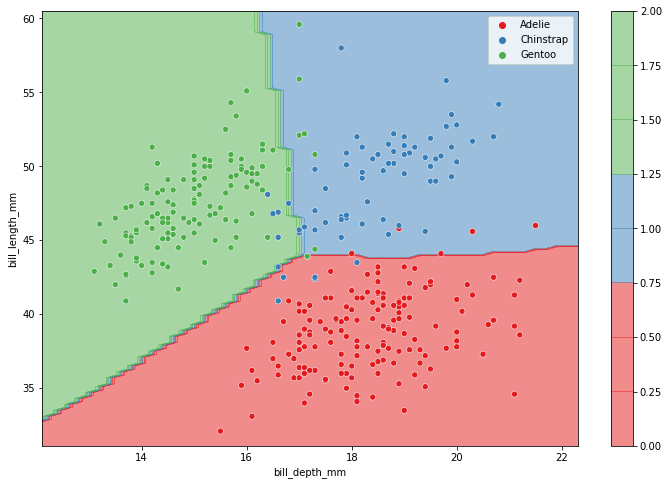

In [17]:
def bayes_plot(df,model="gnb",spread=30):
    
    colors = 'seismic'
    col1 = df.columns[0]
    species = ['Adelie', 'Chinstrap', 'Gentoo']
    col2 = df.columns[1]
    target = df.columns[2]
   
    
    y = df[target]  # Target variable
    X = df.drop(target, axis=1)

    clf = GaussianNB()
    if (model != "gnb"):
        clf = DecisionTreeClassifier(max_depth=model)
    clf = clf.fit(Xtrain, ytrain)

    prob = len(clf.classes_) == 2


    hueorder = clf.classes_

    
    x_min, x_max = X.loc[:, col1].min() - 1, X.loc[:, col1].max() + 1
    y_min, y_max = X.loc[:, col2].min() - 1, X.loc[:, col2].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2),
                         np.arange(y_min, y_max, 0.2))

    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    if prob:

        Z = Z[:,1]-Z[:,0]
    else:
        colors = "Set1"
        Z = np.argmax(Z, axis=1)


    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=colors, alpha=0.5)
    plt.colorbar()
    if not prob:
        plt.clim(0,len(clf.classes_)+3)
    plot = sns.scatterplot(data=df[::spread], x=col1, y=col2, hue=target, hue_order=hueorder,palette=colors)
    fig = plt.gcf()
    legends=plt.legend()
    for i, val in enumerate(species):
            legends.get_texts()[i].set_text(val)
    fig.set_size_inches(12, 8)
    
bayes_plot(pd.concat([X,Y],axis=1),spread=1)
plt.show()

## 1.4
Plot incorrect predictions above the filled contour plot.

In [18]:
def plot_bayes_prediction(df: pd.DataFrame, model: GaussianNB):
    df.dropna()
    col1 = df.columns[0]
    col2 = df.columns[1]
    target = df.columns[2]
    X = df.drop(target, axis=1)

    x_min, x_max = X.loc[:, col1].min() - 1, X.loc[:, col1].max() + 1
    y_min, y_max = X.loc[:, col2].min() - 1, X.loc[:, col2].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2),
                         np.arange(y_min, y_max, 0.2))

    Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = np.argmax(Z, axis=1)
    Z = Z.reshape(xx.shape)

    colors = "Set1"
    plt.ylabel('bill_length (mm)')
    plt.xlabel('bill_depth (mm)')
    plt.title('Filled Contours Plot')
    plt.contourf(xx, yy, Z, cmap=colors, alpha=0.5)
    plt.colorbar()
    plt.clim(0, len(model.classes_) + 3)


In [19]:

def plot_incorrect_predictions(incorrect_predictions: pd.DataFrame, model:GaussianNB):
    colors = "Set1"
    spread = 1
    col1 = incorrect_predictions.columns[0]
    col2 = incorrect_predictions.columns[1]
    target = incorrect_predictions.columns[2]
    hueorder = model.classes_
    sns.scatterplot(data=incorrect_predictions[::spread], x=col1, y=col2, hue=target, hue_order=hueorder, palette=colors,
                    s=20)
    fig = plt.gcf()
    fig.set_size_inches(12, 8)
    plt.show()

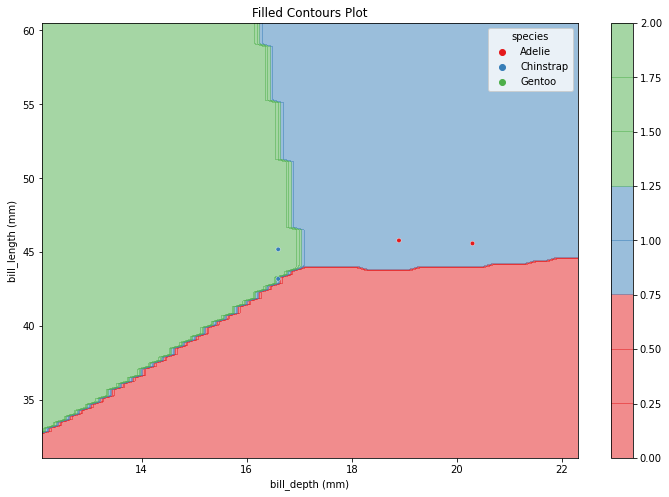

In [20]:
plot_bayes_prediction(pd.concat([X, Y], axis=1), model)
incorrect_predictions = pd.concat([Xtest, ytest], axis=1)[np.array(ytest) != np.array(y_model)]
plot_incorrect_predictions(incorrect_predictions, model)

## 1.5
Clasification report:

In [21]:
print(metrics.classification_report(ytest, ypred))

              precision    recall  f1-score   support

      Adelie       1.00      0.94      0.97        34
   Chinstrap       0.82      0.82      0.82        11
      Gentoo       0.92      1.00      0.96        24

    accuracy                           0.94        69
   macro avg       0.91      0.92      0.92        69
weighted avg       0.94      0.94      0.94        69



## Task 2

In [22]:
df["class"] = df["sex"] + " " + df["species"]
df = df[df['class'].notna()]
df['ordered_class'] = pd.Categorical(df["class"], ordered=True, categories=['Female Adelie', 'Female Chinstrap', 'Female Gentoo', 'Male Adelie', 'Male Chinstrap', 'Male Gentoo']).codes

## 2.1
#### We plot some relations to see if two variables give good split.

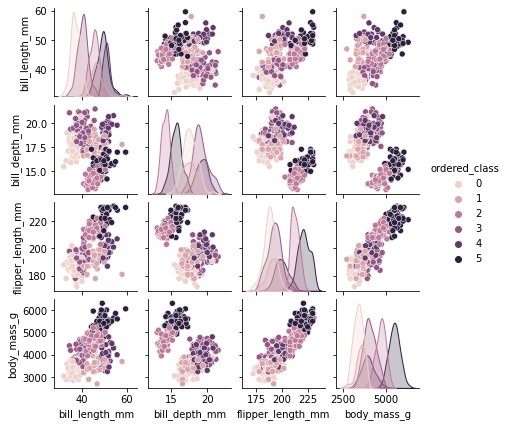

In [23]:
sns.pairplot(df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'ordered_class']], hue='ordered_class', height=1.5)
plt.show()

/Users/lucaskujawski/.virtualenvs/data2/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/lucaskujawski/.virtualenvs/data2/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/lucaskujawski/.virtualenvs/data2/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/lucaskujawski/.virtualenvs/data2/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/lucaskujawski/.virtualenvs/data2/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/lucaskujawski

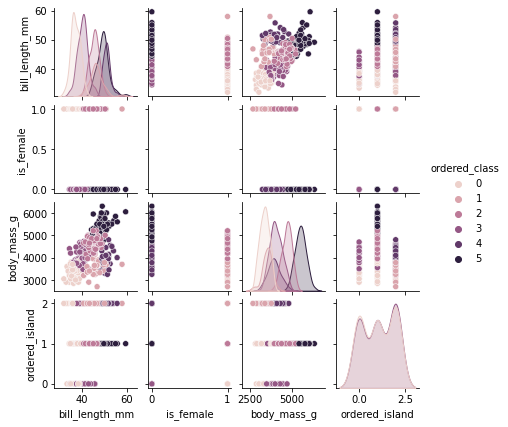

In [24]:
sns.pairplot(df[['bill_length_mm', 'is_female', 'body_mass_g', 'ordered_island', 'ordered_class']], hue='ordered_class', height=1.5)
plt.show()

## 2.2
### body_mass_g vs bill_length_mm is looking good, but it's too hard to decide.
#### We train the models using 80% of the dataset as tranining set

In [25]:
# For loop on GNB classifier to decide which features are better
cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
for i in range(len(cols)):
    for j in range(i+1, len(cols)):
        X = df[[cols[i], cols[j]]]
        Y = df['ordered_class']
        Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=1)
        model = GaussianNB()                       
        model.fit(Xtrain, ytrain)                  
        y_model = model.predict(Xtest)          
        ypred = pd.Series(y_model,name="prediction")
        print("{0} vs {1} accuracy: {2}".format(cols[i], cols[j],metrics.accuracy_score(ytest, y_model)))

bill_length_mm vs bill_depth_mm accuracy: 0.8507462686567164
bill_length_mm vs flipper_length_mm accuracy: 0.8059701492537313
bill_length_mm vs body_mass_g accuracy: 0.8059701492537313
bill_depth_mm vs flipper_length_mm accuracy: 0.6567164179104478
bill_depth_mm vs body_mass_g accuracy: 0.6716417910447762
flipper_length_mm vs body_mass_g accuracy: 0.7164179104477612


In [26]:
## 2.3
#### We see that bill_depth_mm vs bill_length_mm has again better accuracy.
#### Lets plot it

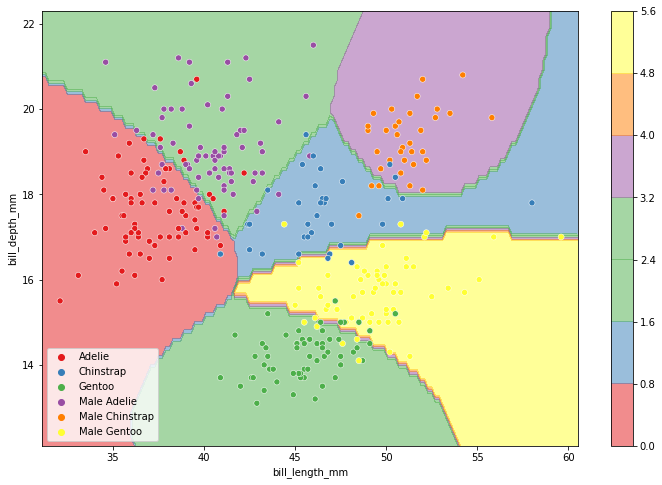

In [27]:
X = df[['bill_length_mm', 'bill_depth_mm']]
Y = df['class']
model = GaussianNB()
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=1)
model = GaussianNB()                       
model.fit(Xtrain, ytrain)                  
y_model = model.predict(Xtest)
ypred = pd.Series(y_model,name="prediction")
bayes_plot(pd.concat([X,Y],axis=1),spread=1)
plt.show()

## 2.4
Plot incorrect predictions above the filled contour plot.

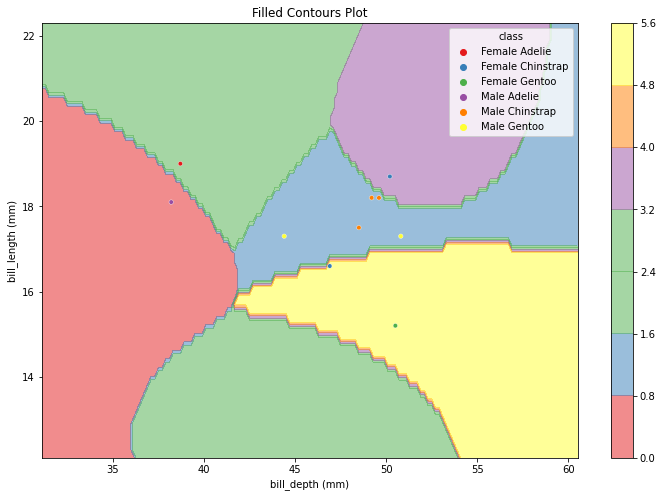

In [28]:
plot_bayes_prediction(pd.concat([X, Y], axis=1), model)
incorrect_predictions = pd.concat([Xtest, ytest], axis=1)[np.array(ytest) != np.array(y_model)]
plot_incorrect_predictions(incorrect_predictions, model)

## 2.5
Clasification report:

In [29]:
print(metrics.classification_report(ytest, ypred))

                  precision    recall  f1-score   support

   Female Adelie       0.90      0.90      0.90        10
Female Chinstrap       0.50      0.71      0.59         7
   Female Gentoo       1.00      0.93      0.96        14
     Male Adelie       0.94      0.94      0.94        18
  Male Chinstrap       0.88      0.70      0.78        10
     Male Gentoo       0.75      0.75      0.75         8

        accuracy                           0.85        67
       macro avg       0.83      0.82      0.82        67
    weighted avg       0.87      0.85      0.86        67

